# 5864_MLinEDU TA Lecture 4: Kmeans Clustering
Teacher: Chun-Shu Wei  
Teaching Assistant: 劉昱劭,Min-Jiun Tsai  
## K-means Clustering in Python[1]
K-means clustering is a clustering algorithm that aims to partition n observations into k clusters.  
There are 3 steps:

+ Initialization – K initial “means” (centroids) are generated at random
+ Assignment – K clusters are created by associating each observation with the nearest centroid
+ Update – The centroid of the clusters becomes the new mean
Assignment and Update are repeated iteratively until convergence.    
The end result is that the sum of squared errors is minimized between points and their respective centroids.  
We’ll do this manually first, then show how it’s done using scikit-learn.    

In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Magic Functions : Plot figure without plt.show() if we use this command
%matplotlib inline

In [2]:
# prepare data
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

In [3]:
df

,x,y
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54
5,33,46
6,24,55
7,45,59
8,45,63
9,52,70


### Step1: Initialization
K initial “means” (centroids) are generated at random.
#### Example: K=3

In [4]:
# Random choose centroids
np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

In [5]:
centroids

{1: [26, 16], 2: [68, 42], 3: [55, 76]}

(0, 80)

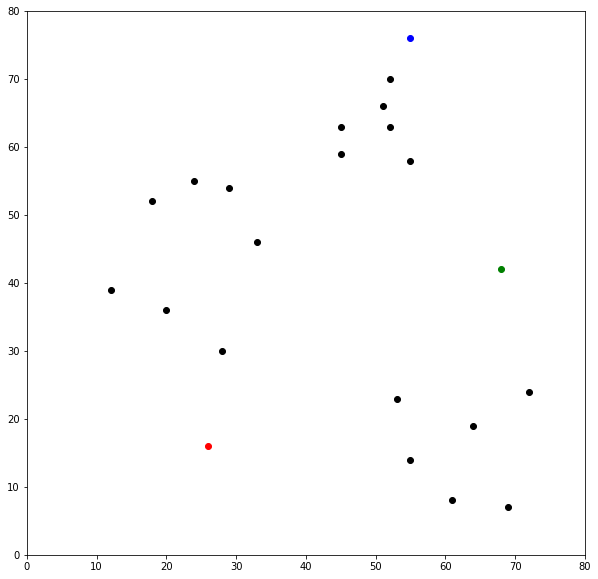

In [6]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
# mark 3 centroids 1,2, and 3 in color red, green and blue respectively
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
#plt.show()

In [7]:
for i in centroids.keys():
    print(centroids[i],*centroids[i])

[26, 16] 26 16
[68, 42] 68 42
[55, 76] 55 76


### Step 2: Assignment
K clusters are created by associating each observation with the nearest centroid.

In [8]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        # Here we use Euclidean distance
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    # column 'closet' records the centroid which is closest to current data point
    ## Here, values in column 'closet' are strings: distance_from_1, distance_from_2, and distance_from_3
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    ## We revise values in column 'closet' distance_from_i into i and convert string i into integer i
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [9]:
df = assignment(df, centroids)
df

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,26.925824,56.080300,56.727418,1,r
1,20,36,20.880613,48.373546,53.150729,1,r
2,28,30,14.142136,41.761226,53.338541,1,r
3,18,52,36.878178,50.990195,44.102154,1,r
4,29,54,38.118237,40.804412,34.058773,3,b
5,33,46,30.805844,35.227830,37.202150,1,r
6,24,55,39.051248,45.880279,37.443290,3,b
7,45,59,47.010637,28.600699,19.723083,3,b
8,45,63,50.695167,31.144823,16.401219,3,b
9,52,70,59.933296,32.249031,6.708204,3,b


In [10]:
# Check first 5 elements 
df.head()

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,26.925824,56.080300,56.727418,1,r
1,20,36,20.880613,48.373546,53.150729,1,r
2,28,30,14.142136,41.761226,53.338541,1,r
3,18,52,36.878178,50.990195,44.102154,1,r
4,29,54,38.118237,40.804412,34.058773,3,b


In [11]:
# Since we need to plot figures in this handout many times, we define above figure plotting commands as a function 
def plot_result(x,y,color,centroids):
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(x, y, color=color, alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    #plt.show()

### Step 3: Update
The centroid of the clusters becomes the new mean Assignment and Update are repeated iteratively until convergence.

In [12]:
import copy
old_centroids = copy.deepcopy(centroids)

In [13]:
copy.deepcopy?

https://www.itread01.com/content/1544614591.html

In [13]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [14]:
centroids = update(centroids)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


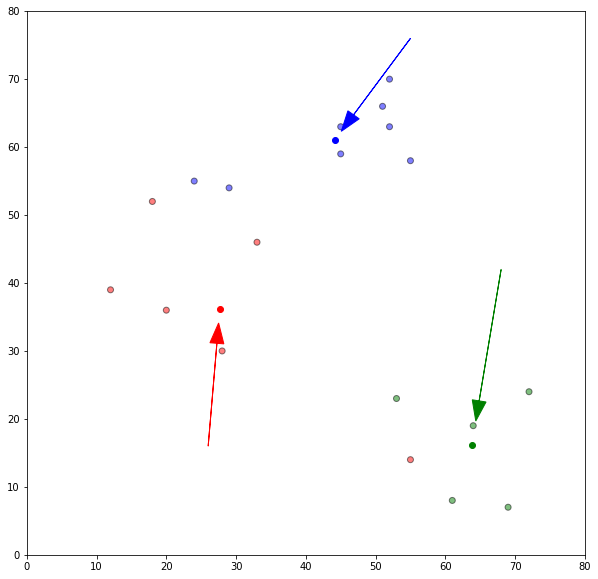

In [15]:
plot_result(df['x'],df['y'],df['color'],centroids)
ax = plt.axes()
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
    #plt.show()

## Repeat assignment until centroids are unchange

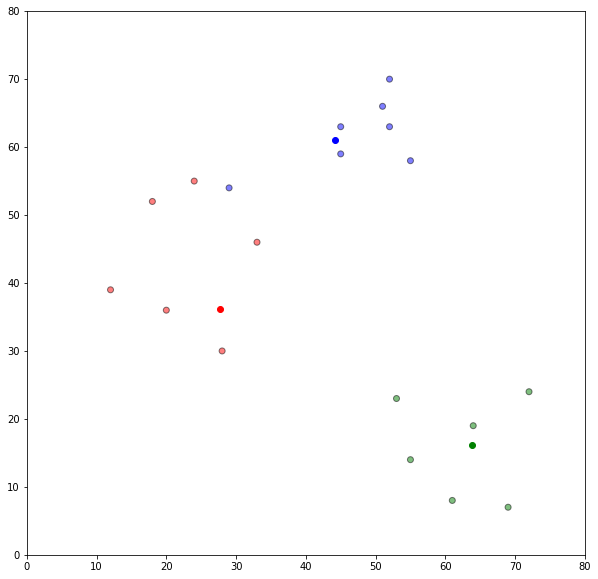

In [16]:
## Repeat Assigment Stage
df = assignment(df, centroids)
# Plot result
plot_result(df['x'],df['y'],df['color'],centroids)

3th iteration
4th iteration
Stop at 4th iteration


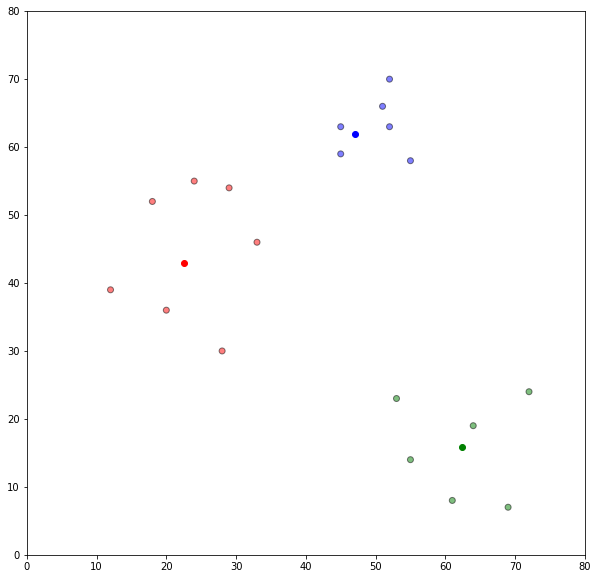

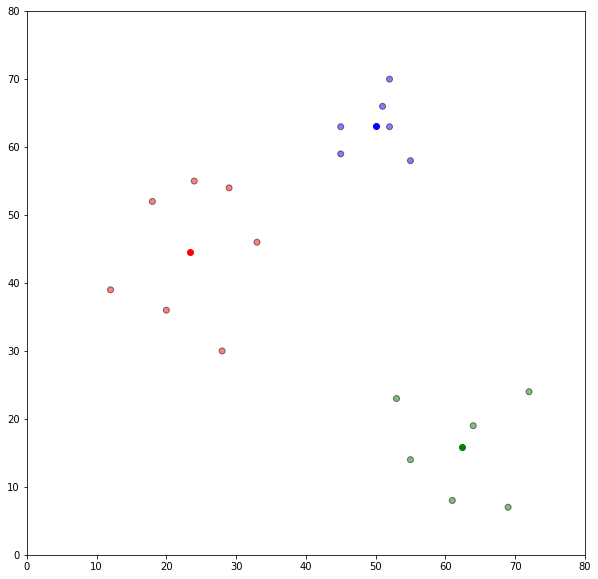

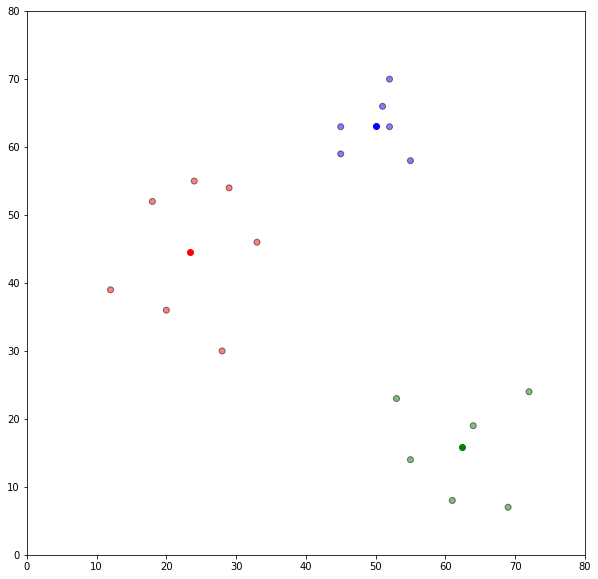

In [17]:
# Continue until all assigned categories don't change any more
count=3
for i in range(10):
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    print('{}th iteration'.format(count+i))
    plot_result(df['x'],df['y'],df['color'],centroids)
    if closest_centroids.equals(df['closest']):
        print('Stop at {}th iteration'.format(count+i))
        plot_result(df['x'],df['y'],df['color'],centroids)
        break

In [18]:
df

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,12.714286,55.408834,45.033629,1,r
1,20,36,9.231711,46.891423,40.472556,1,r
2,28,30,15.271689,37.141247,39.799846,1,r
3,18,52,9.200710,57.214266,33.892395,1,r
4,29,54,10.951656,50.673519,22.913485,1,r
5,33,46,9.677451,42.076980,24.159769,1,r
6,24,55,10.444215,54.803943,27.252421,1,r
7,45,59,25.952075,46.516723,6.508541,3,b
8,45,63,28.371443,50.250760,5.002777,3,b
9,52,70,38.248383,55.143500,7.120003,3,b


In [19]:
centroids

{1: [23.428571428571427, 44.57142857142857],
 2: [62.333333333333336, 15.833333333333334],
 3: [50.0, 63.166666666666664]}

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['x','y']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
sk_color = kmeans.predict(df[['x','y']])
sk_centroids = kmeans.cluster_centers_

In [64]:
colmap_1 = {1: 'g', 2: 'r', 3: 'b'}
colors = list(map(lambda x: colmap_1[x+1], sk_color))

In [65]:
colors

['r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g']

In [61]:
list(colors)

[]

In [59]:
df['color']

0     r
1     r
2     r
3     r
4     r
5     r
6     r
7     b
8     b
9     b
10    b
11    b
12    b
13    g
14    g
15    g
16    g
17    g
18    g
Name: color, dtype: object

(0, 80)

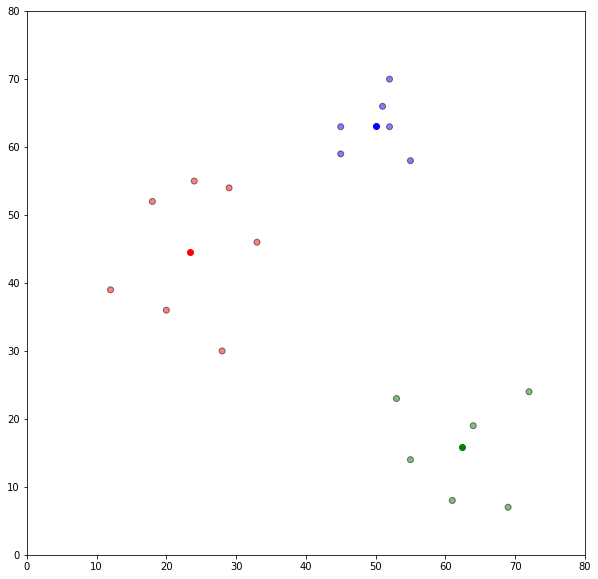

In [68]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'], color=list(colors), alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(sk_centroids):
    plt.scatter(*centroid, color=colmap_1[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)

### Which 'K' should we choose?[2]

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

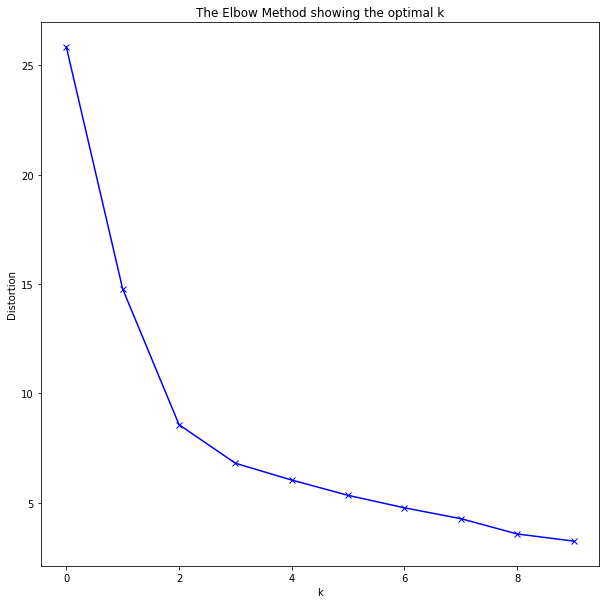

In [72]:
from scipy.spatial.distance import cdist
# k means determine k
distortions = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['x','y']])
    distortions.append(sum(np.min(cdist(df[['x','y']], kmeans.cluster_centers_, 'euclidean'), axis=1)) / len(df['x']))

# Plot the elbow
fig = plt.figure(figsize=(10, 10))
plt.plot(range(10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

## Reference:
1.http://benalexkeen.com/k-means-clustering-in-python/  
2.https://pythonprogramminglanguage.com/kmeans-elbow-method/